In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline

In [142]:
Data = pd.read_csv("D:\Downloads\heart_data.txt")

In [143]:
Data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [144]:
Data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [145]:
Data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: xlabel='target'>

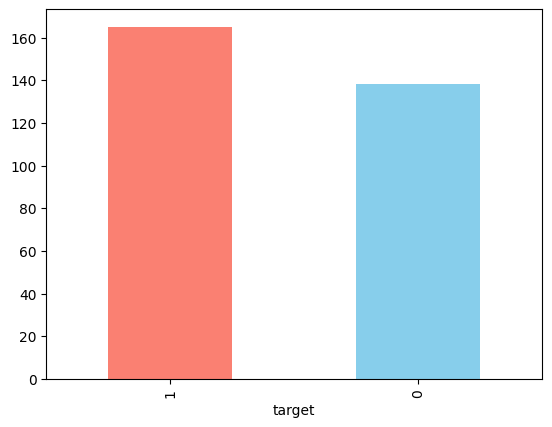

In [146]:
colors2=['salmon', 'skyblue']
Data['target'].value_counts().plot(kind="bar", color= colors2)

In [147]:
categorical = []
continuous = []
for values in Data.columns:
    print(f"{values}: {Data[values].unique()}")
    if len(Data[values].unique()) <=10:
       categorical.append(values)
    else:
       continuous.append(values)

print("Categorical:", categorical)
print("Continuous:" ,continuous)

age: [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex: [1 0]
cp: [3 2 1 0]
trestbps: [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol: [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs: [1 0]

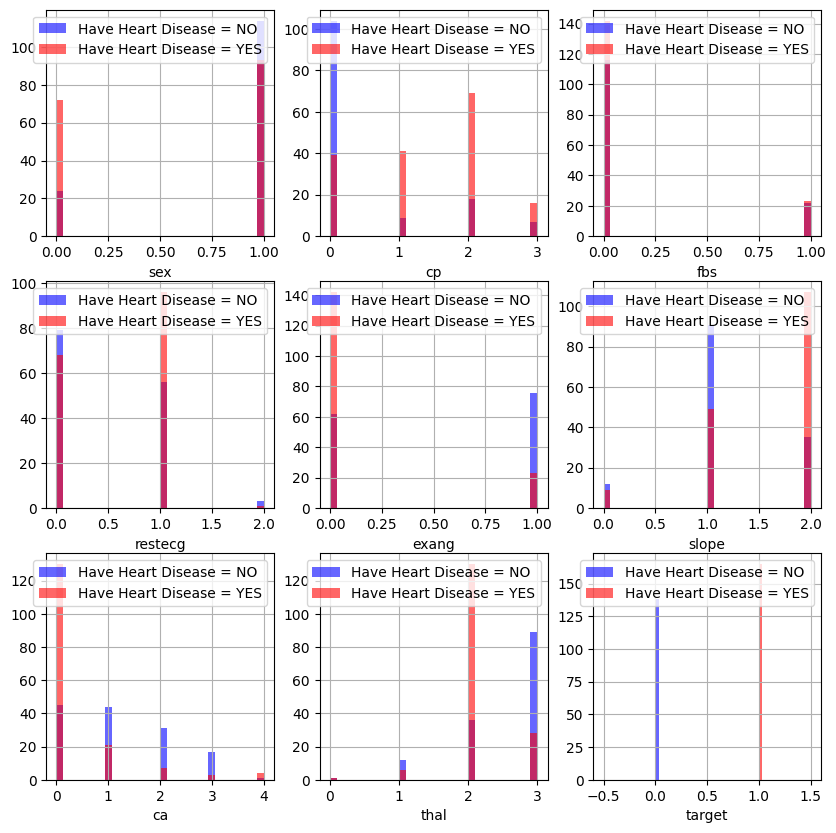

In [148]:
plt.figure(figsize=(10,10))
for i, column in enumerate(categorical,1):
    plt.subplot(3, 3, i)
    Data[Data["target"] == 0][column].hist(bins=30, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    Data[Data["target"] == 1][column].hist(bins=30, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

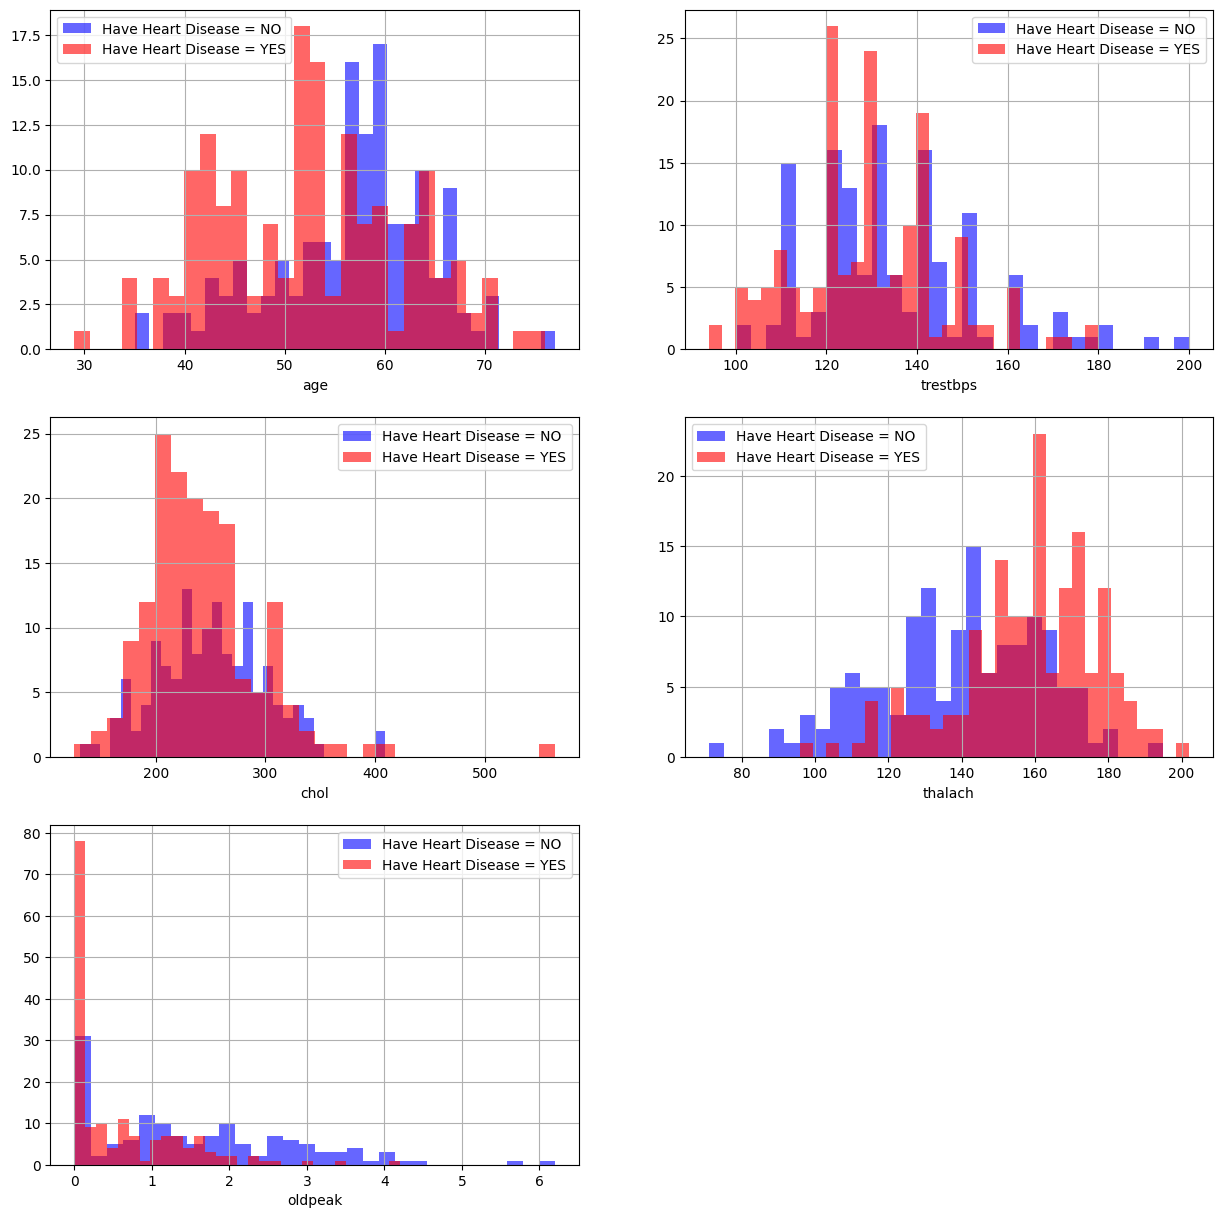

In [149]:
plt.figure(figsize=(15,15))
for i, column in enumerate(continuous,1):
    plt.subplot(3, 2, i)
    Data[Data["target"] == 0][column].hist(bins=30, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    Data[Data["target"] == 1][column].hist(bins=30, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

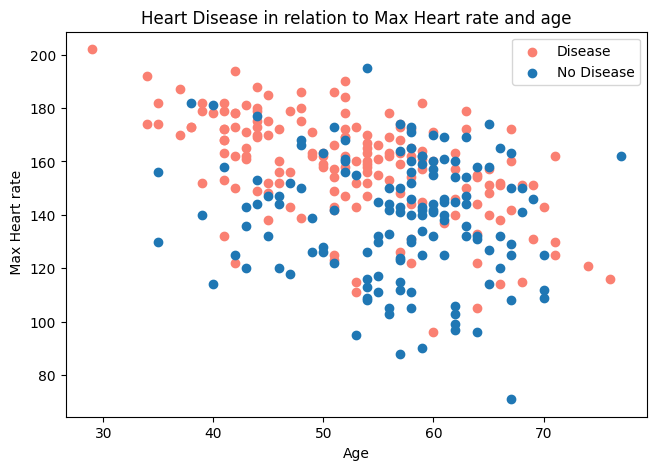

In [150]:
plt.figure(figsize=(7.5,5))
plt.scatter(Data.age[Data.target==1], Data.thalach[Data.target==1], color="salmon")

plt.scatter(Data.age[Data.target==0], Data.thalach[Data.target==0])

plt.title("Heart Disease in relation to Max Heart rate and age")
plt.xlabel("Age")
plt.ylabel(" Max Heart rate")
plt.legend(["Disease", "No Disease"]);

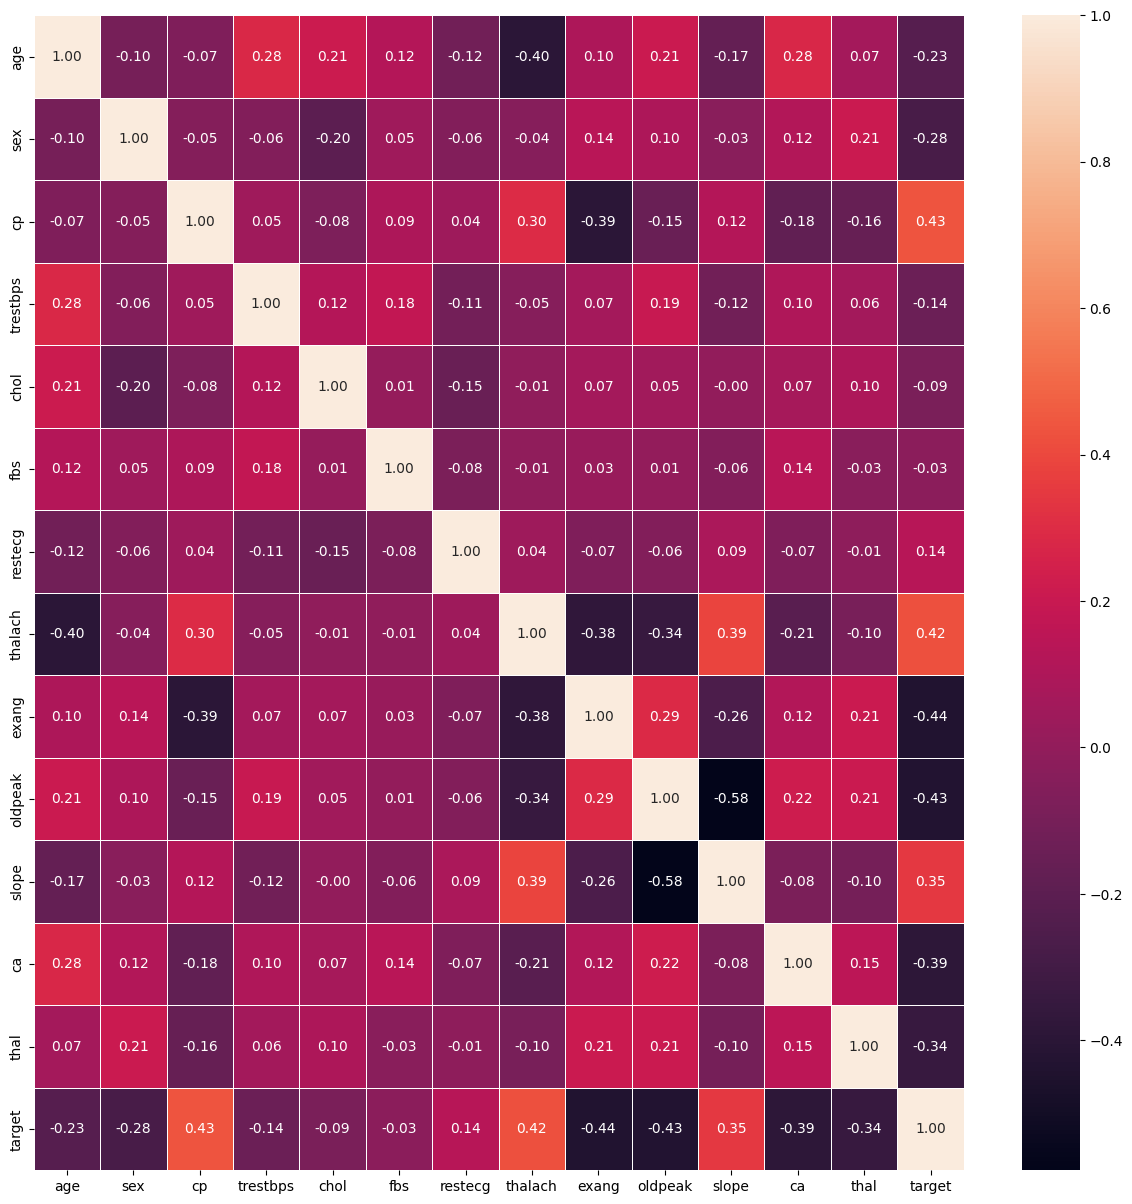

In [151]:
correlation_matrix = Data.corr()
fig, mx = plt.subplots(figsize=(15,15))
mx = sns.heatmap(correlation_matrix, 
                 annot=True, linewidths=0.5,
                 fmt=".2f")

<Axes: title={'center': 'Correlation with Target'}>

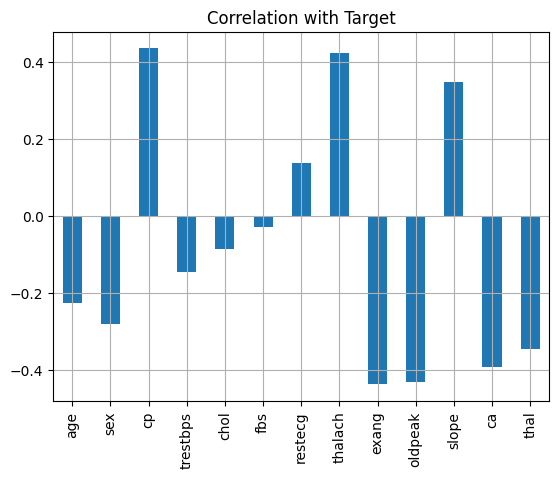

In [152]:
Data.drop('target', axis=1).corrwith(Data.target).plot(kind="bar", grid=True, title="Correlation with Target")

In [153]:
if "target" in categorical:
    categorical.remove('target')
dataset = pd.get_dummies(Data, columns= categorical)
from sklearn.preprocessing import StandardScaler
standard_sl = StandardScaler()
column_scale=['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[column_scale]= standard_sl.fit_transform(dataset[column_scale])
print(dataset.head())

        age  trestbps      chol   thalach   oldpeak  target  sex_0  sex_1  \
0  0.952197  0.763956 -0.256334  0.015443  1.087338       1  False   True   
1 -1.915313 -0.092738  0.072199  1.633471  2.122573       1  False   True   
2 -1.474158 -0.092738 -0.816773  0.977514  0.310912       1   True  False   
3  0.180175 -0.663867 -0.198357  1.239897 -0.206705       1  False   True   
4  0.290464 -0.663867  2.082050  0.583939 -0.379244       1   True  False   

    cp_0   cp_1  ...  slope_2  ca_0   ca_1   ca_2   ca_3   ca_4  thal_0  \
0  False  False  ...    False  True  False  False  False  False   False   
1  False  False  ...    False  True  False  False  False  False   False   
2  False   True  ...     True  True  False  False  False  False   False   
3  False   True  ...     True  True  False  False  False  False   False   
4   True  False  ...     True  True  False  False  False  False   False   

   thal_1  thal_2  thal_3  
0    True   False   False  
1   False    True   False  
2 

In [185]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

X = dataset.drop('target', axis=1)
y = dataset.target

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.40, random_state=42)
model = LogisticRegression(solver = 'liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)*100
print(f"Accuracy: {accuracy:.2f}")

class_report =pd.DataFrame(classification_report(y_test, y_pred, output_dict= True))
print("Classification report:\n", class_report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 87.70
Classification report:
                    0          1  accuracy   macro avg  weighted avg
precision   0.877551   0.876712  0.877049    0.877132      0.877070
recall      0.826923   0.914286  0.877049    0.870604      0.877049
f1-score    0.851485   0.895105  0.877049    0.873295      0.876513
support    52.000000  70.000000  0.877049  122.000000    122.000000
Confusion Matrix:
 [[43  9]
 [ 6 64]]


In [192]:
test_score = accuracy_score(y_test, model.predict(X_test)) * 100
train_score = accuracy_score(y_train, model.predict(X_train)) * 100

print(f"Test Score:, {test_score:.2f}")
print(f"Train_Score:, {train_score:.2f}")

Test Score:, 87.70
Train_Score:, 86.74
